## 


---

### Import Libraries

In [3]:
import sys
import os

root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import modules.statistics_fwl_estimation as st_fwl

from modules import processing, load, plots, analysis

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)

---

### Load data

---

### Create an artificial DataFrame (for graph testing only)

In [3]:
# List of 25 well IDs as provided
well_ids = [
    "AW1D_YSI_20230826", "AW2D_YSI_20230815", "AW5D_YSI_20230824", "AW6D_YSI_20230815",
    "AW7D_YSI_20230814", "BW1D_YSI_20230824", "BW2D_YSI_20230819", "BW3D_YSI_20230818",
    "BW4D_YSI_20230816", "BW5D_YSI_20230822", "BW6D_YSI_20230826", "BW7D_YSI_20230826",
    "BW8D_YSI_20230823", "BW9D_YSI_20230823", "BW10D_YSI_20230825", "BW11D_YSI_20230823",
    "LRS33D_YSI_20230822", "LRS65D_YSI_20230827", "LRS69D_YSI_20230818", "LRS70D_YSI_20230822",
    "LRS75D_YSI_20230819", "LRS79D_YSI_20230827", "LRS81D_YSI_20230823", "LRS89D_YSI_20230825",
    "LRS90D_YSI_20230827"
]

# Create a DataFrame with filtering points for each well.
# For demonstration, generate random filtering points in the range [10, 15] for each method.
np.random.seed(42)
file_info = {
    "ID": well_ids,
    "vp_dgh": [round(np.random.uniform(10, 15), 2) for _ in well_ids],
    "vp_bic": [round(np.random.uniform(10, 15), 2) for _ in well_ids],
    "vp_ic":  [round(np.random.uniform(10, 15), 2) for _ in well_ids]
}
file_info_df = pd.DataFrame(file_info)


In [4]:
file_info_df

,ID,vp_dgh,vp_bic,vp_ic
0,AW1D_YSI_20230826,11.87,13.93,14.85
1,AW2D_YSI_20230815,14.75,11.00,13.88
2,AW5D_YSI_20230824,13.66,12.57,14.70
3,AW6D_YSI_20230815,12.99,12.96,14.47
4,AW7D_YSI_20230814,10.78,10.23,12.99
5,BW1D_YSI_20230824,10.78,13.04,14.61
6,BW2D_YSI_20230819,10.29,10.85,10.44
7,BW3D_YSI_20230818,14.33,10.33,10.98
8,BW4D_YSI_20230816,13.01,14.74,10.23
9,BW5D_YSI_20230822,13.54,14.83,11.63


In [5]:
filtered_data = st_fwl.load_and_filter_data(file_info_df, subfolder='rawdy')

---

### **Statistics**

In [7]:
df_stats = st_fwl.compute_statistics(filtered_data, 
                                    file_info_df, 
                                    "Corrected sp Cond [uS/cm]"
                                     )

df_stats

,id,method,fwl_thickness,mean,std,cv,min,max,median,25%,50%,75%,iqr
0,AW1D_YSI_20230826,IC,14.85,1551.727450,82.857616,0.053397,1302.000000,1746.600000,1521.700000,1515.200000,1521.700000,1567.9000,52.700000
1,AW1D_YSI_20230826,BIC,13.93,1538.557209,68.959393,0.044821,1302.000000,1730.000000,1519.100000,1515.000000,1519.100000,1561.6000,46.600000
2,AW1D_YSI_20230826,DGH,11.87,1511.589180,39.695331,0.026261,1302.000000,1568.925000,1517.500000,1510.500000,1517.500000,1528.4250,17.925000
3,AW2D_YSI_20230815,IC,13.88,600.942994,356.065220,0.592511,389.000000,2616.400000,447.800000,411.400000,447.800000,637.1000,225.700000
4,AW2D_YSI_20230815,BIC,11.00,450.300223,73.564700,0.163368,389.000000,736.150000,432.000000,406.550000,432.000000,456.9000,50.350000
5,AW2D_YSI_20230815,DGH,14.75,830.520045,996.408284,1.199740,389.000000,5227.600000,449.550000,412.200000,449.550000,721.5625,309.362500
6,AW5D_YSI_20230824,IC,14.70,1091.884802,703.020766,0.643860,685.100000,5172.700000,776.050000,708.600000,776.050000,1195.1000,486.500000
7,AW5D_YSI_20230824,BIC,12.57,827.642638,183.650766,0.221896,685.100000,1445.000000,738.200000,707.495000,738.200000,900.9500,193.455000
8,AW5D_YSI_20230824,DGH,13.66,891.460078,271.652489,0.304728,685.100000,1707.350000,753.100000,707.700000,753.100000,998.7000,291.000000
9,AW6D_YSI_20230815,IC,14.47,745.102938,600.891124,0.806454,96.800000,2808.400000,441.350000,432.700000,441.350000,831.6000,398.900000


##### Save stats

In [9]:
# df_stats.to_csv(f'{root}/data/statistics_profiles_methods.csv', 
#                 index=False)

---

### **Boxplots**

In [20]:
# Only base name
order_plot = [
    "LRS70D_YSI_20230822", # Last
    "BW9D_YSI_20230823", 
    "BW11D_YSI_20230823",
    "BW8D_YSI_20230823",
    "LRS81D_YSI_20230823",
    "BW1D_YSI_20230824",
    "LRS79D_YSI_20230827",
    "AW1D_YSI_20230826",
    "LRS90D_YSI_20230827",
    "AW2D_YSI_20230815",
    "AW5D_YSI_20230824",
    "BW2D_YSI_20230819",
    "LRS75D_YSI_20230819",
    "LRS89D_YSI_20230825",
    "LRS65D_YSI_20230827",
    "AW7D_YSI_20230814",
    "AW6D_YSI_20230815",
    "BW3D_YSI_20230818",
    "BW10D_YSI_20230825",
    "BW6D_YSI_20230826",
    "BW4D_YSI_20230816",
    "LRS69D_YSI_20230818",
    "LRS33D_YSI_20230822",
    "BW7D_YSI_20230826",
    "BW5D_YSI_20230822" # First
]

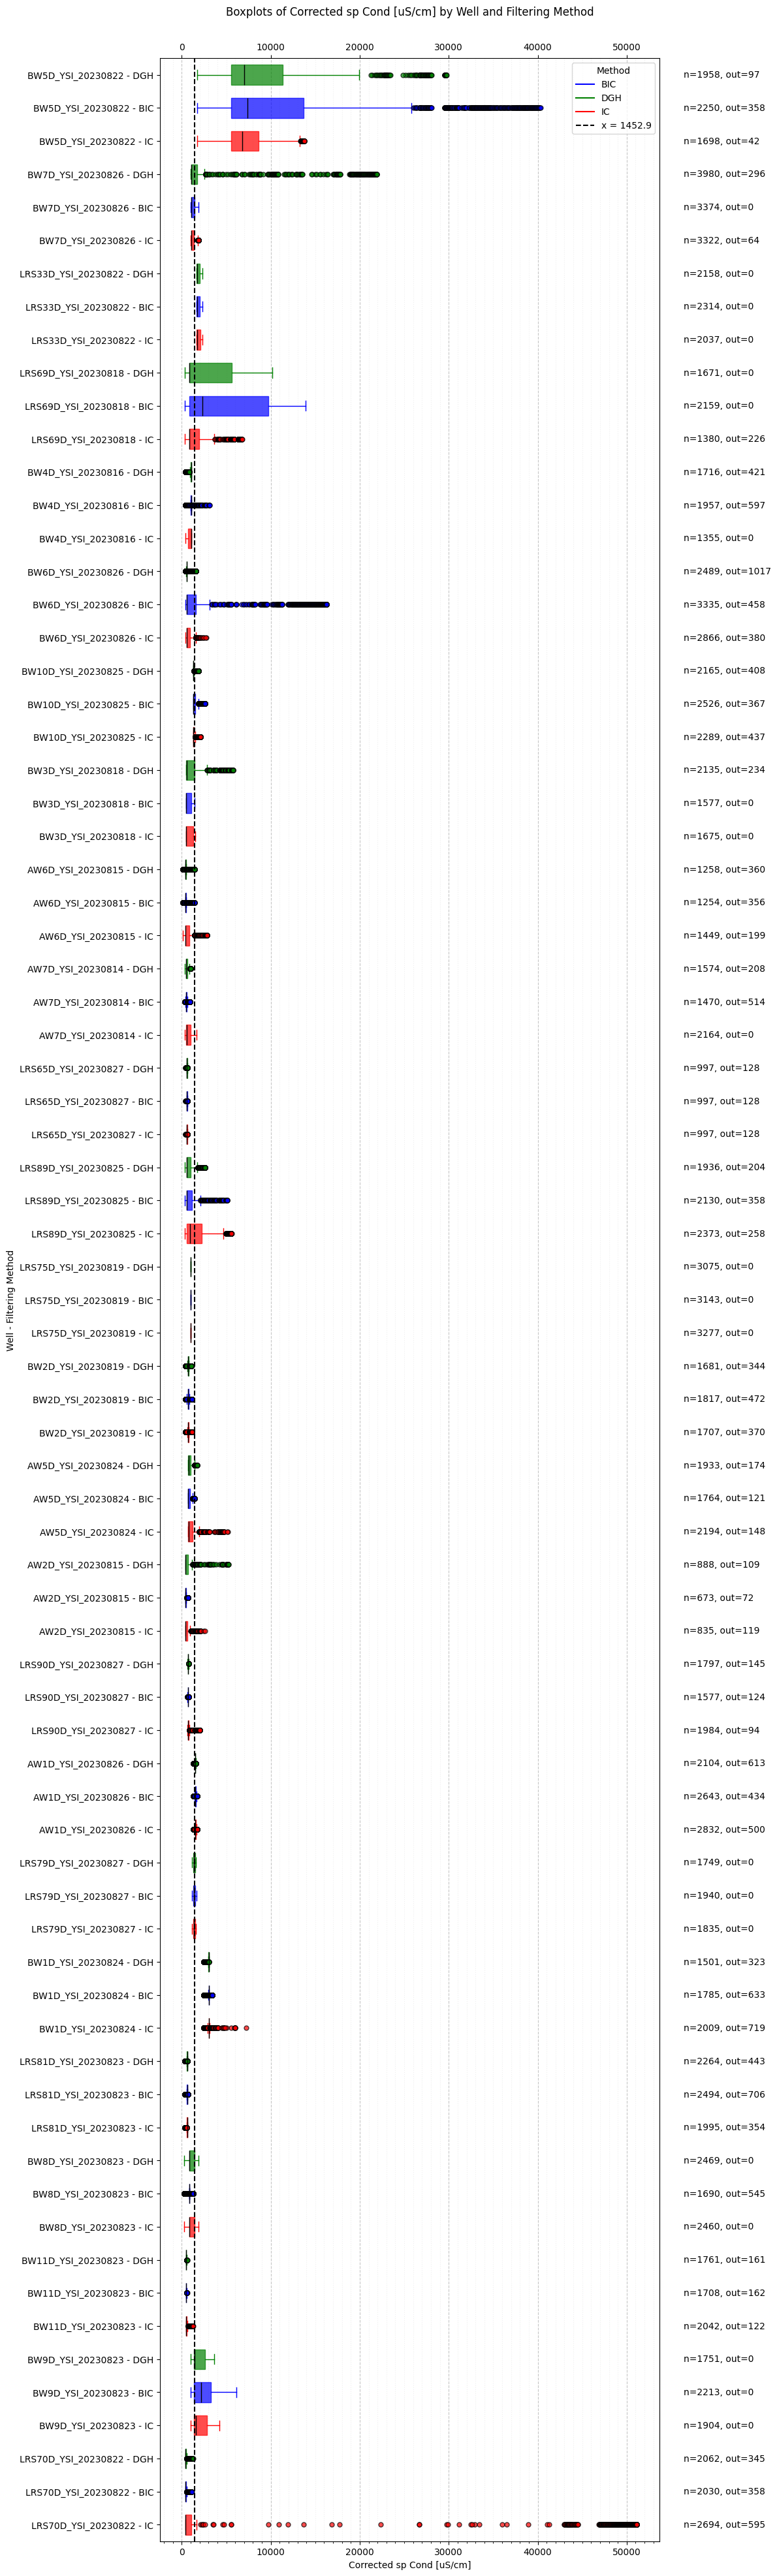

In [21]:
fig = st_fwl.generate_boxplots_matplotlib(filtered_data, 
                        variable="Corrected sp Cond [uS/cm]", 
                        show_outliers=True,
                        order= order_plot, 
                        legend_x=1.0,
                        legend_y=1.0, 
                        legend_orientation='h',
                        mirror_top_axis=True,
                        enable_minor_ticks=True,
                        draw_vertical_line=True
                        )